# Homework 2

Using the same code as in Homework #1, create a DataFrame of returns on the current constituents of the Dow Jones Industrial Average, going back to 2001.

In [159]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import scipy.optimize as sco
import matplotlib.pyplot as plt

In [160]:
dow = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]
dow

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M Company,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,3.76%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,2.99%
2,Amgen,NASDAQ,AMGN,Pharmaceutical industry,2020-08-31,NaN,4.68%
3,Apple Inc.,NASDAQ,AAPL,Information technology,2015-03-19,NaN,2.44%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,5.00%
5,Caterpillar Inc.,NYSE,CAT,Construction and Mining,1991-05-06,NaN,4.50%
6,Chevron Corporation,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,2.27%
7,Cisco Systems,NASDAQ,CSCO,Information technology,2009-06-08,NaN,0.98%
8,The Coca-Cola Company,NYSE,KO,Food industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.05%
9,Dow Inc.,NYSE,DOW,Chemical industry,2019-04-02,NaN,1.31%


In [161]:
symbol_list = dow["Symbol"].tolist()
dow_returns = pd.DataFrame()
for tic in symbol_list:
    name = tic
    dow_returns[name] = pdr.get_data_yahoo(name,2001)["Adj Close"]

In [162]:
daily_returns_dow = dow_returns.pct_change(1)

In [163]:
first_string = "2001-01-02"
first_date = datetime.strptime(first_string,"%Y-%m-%d")
daily_returns_dow.drop(axis=0,index=first_date,inplace=True)

In [164]:
daily_returns_dow

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DOW,...,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT,DIS
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-03,-0.011537,0.077379,0.066601,0.100842,0.009073,0.004049,-0.038546,0.240150,-0.025694,NaN,...,0.033487,-0.049363,NaN,-0.009733,-0.029692,0.057214,NaN,-0.038284,0.084687,0.111857
2001-01-04,0.010080,-0.031285,-0.065238,0.041985,-0.024976,0.047042,-0.021180,0.013616,-0.028481,NaN,...,0.025698,-0.030988,NaN,-0.046682,-0.069946,0.029412,NaN,-0.049364,-0.038503,0.028169
2001-01-05,-0.037290,-0.048443,-0.069791,-0.040294,-0.036884,-0.057766,0.007729,-0.125373,0.002172,NaN,...,-0.043573,0.036301,NaN,-0.018042,0.014101,-0.002286,NaN,0.018426,-0.040044,-0.013699
2001-01-08,0.006001,-0.050909,0.006431,0.011450,0.004255,-0.002725,-0.002301,-0.002133,0.016251,NaN,...,0.050114,0.021685,NaN,0.028871,-0.003476,0.002135,NaN,0.008224,0.000000,-0.043651
2001-01-09,-0.015727,-0.040869,0.056443,0.037737,-0.001059,-0.001366,-0.013067,0.015819,0.012794,NaN,...,0.031454,-0.025307,NaN,-0.022959,0.010465,0.023042,NaN,-0.014682,-0.022016,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-08,0.016427,0.019955,0.000351,-0.041674,0.003629,0.006450,0.006881,0.027243,0.016736,0.008425,...,0.009074,0.010557,-0.014424,0.022250,0.008845,0.014107,0.022562,0.027119,-0.009603,0.062740
2021-03-09,-0.014094,-0.034405,0.005180,0.040650,0.029371,-0.021572,-0.002278,0.007998,-0.015105,-0.018600,...,0.010330,-0.008876,0.018342,-0.006972,0.005169,-0.010389,0.000409,-0.000413,0.007898,-0.036650
2021-03-10,0.018380,0.011371,0.004236,-0.009167,0.063874,0.019649,0.017078,0.008353,0.011404,0.029393,...,0.012063,0.009193,0.002033,0.010142,-0.006762,0.015658,0.012752,0.042509,0.025526,0.002828


Calculate the mean, volatility, and covariance of the returns in *annual* terms.

Note: Since the returns are daily, and since there are 252 trading days in a typical year, we multiply the mean return by 252 and the volatility by $\sqrt{252}$ (so the variance/covariance terms are multiplied by 252).

In [165]:
ann_dow_mean = daily_returns_dow.mean() * 252
ann_dow_mean
#daily_returns_dow.describe()

MMM     0.108484
AXP     0.138486
AMGN    0.118719
AAPL    0.378855
BA      0.153849
CAT     0.191592
CVX     0.122767
CSCO    0.099147
KO      0.072780
DOW     0.315072
GS      0.138540
HD      0.152154
HON     0.147023
IBM     0.074526
INTC    0.121900
JNJ     0.100382
JPM     0.167688
MCD     0.143176
MRK     0.062416
MSFT    0.182987
NKE     0.201619
PG      0.103567
CRM     0.325969
TRV     0.122857
UNH     0.216528
VZ      0.084755
V       0.266630
WBA     0.069785
WMT     0.087670
DIS     0.153789
dtype: float64

In [166]:
#Volatility as stdev
ann_dow_vol = np.sqrt(daily_returns_dow.var() * np.sqrt(252))
ann_dow_vol

MMM     0.058154
AXP     0.091225
AMGN    0.073562
AAPL    0.092272
BA      0.086767
CAT     0.080395
CVX     0.069809
CSCO    0.091251
KO      0.049325
DOW     0.125481
GS      0.090549
HD      0.072974
HON     0.073499
IBM     0.062942
INTC    0.089423
JNJ     0.046986
JPM     0.097709
MCD     0.057033
MRK     0.065977
MSFT    0.072888
NKE     0.071110
PG      0.047223
CRM     0.108188
TRV     0.072407
UNH     0.079089
VZ      0.057803
V       0.076402
WBA     0.070343
WMT     0.054481
DIS     0.074914
dtype: float64

In [167]:
#Volatility as variance
ann_dow_cov = daily_returns_dow.cov() * np.sqrt(252)
ann_dow_cov

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DOW,...,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT,DIS
MMM,0.003382,0.002958,0.001702,0.002083,0.002462,0.002862,0.002149,0.002462,0.001345,0.006107,...,0.001914,0.001286,0.002313,0.002129,0.001838,0.001416,0.002301,0.001753,0.001290,0.002299
AXP,0.002958,0.008322,0.002457,0.003402,0.004232,0.004203,0.003429,0.003960,0.001924,0.009857,...,0.003155,0.001705,0.003867,0.003795,0.002957,0.002308,0.004599,0.002523,0.001833,0.004112
AMGN,0.001702,0.002457,0.005411,0.002196,0.002020,0.002047,0.001840,0.002459,0.001191,0.003998,...,0.001583,0.001296,0.002229,0.001893,0.002074,0.001449,0.002070,0.001732,0.001382,0.002108
AAPL,0.002083,0.003402,0.002196,0.008514,0.002652,0.002990,0.002156,0.004051,0.001315,0.005362,...,0.002406,0.001214,0.003685,0.002235,0.002087,0.001640,0.003013,0.001723,0.001545,0.002726
BA,0.002462,0.004232,0.002020,0.002652,0.007528,0.003538,0.003117,0.002939,0.001744,0.011636,...,0.002608,0.001432,0.003166,0.002780,0.002496,0.001636,0.003322,0.002271,0.001468,0.003265
CAT,0.002862,0.004203,0.002047,0.002990,0.003538,0.006463,0.003150,0.003303,0.001549,0.008842,...,0.002542,0.001352,0.003535,0.002681,0.002269,0.001802,0.003252,0.002187,0.001531,0.003192
CVX,0.002149,0.003429,0.001840,0.002156,0.003117,0.003150,0.004873,0.002372,0.001527,0.008884,...,0.002002,0.001366,0.002793,0.002568,0.002387,0.001644,0.003014,0.001824,0.001144,0.002597
CSCO,0.002462,0.003960,0.002459,0.004051,0.002939,0.003303,0.002372,0.008327,0.001463,0.005876,...,0.002614,0.001397,0.003632,0.002577,0.001902,0.002095,0.002952,0.001973,0.001833,0.003307
KO,0.001345,0.001924,0.001191,0.001315,0.001744,0.001549,0.001527,0.001463,0.002433,0.004809,...,0.001332,0.001260,0.001541,0.001531,0.001480,0.001221,0.001539,0.001266,0.000988,0.001605
DOW,0.006107,0.009857,0.003998,0.005362,0.011636,0.008842,0.008884,0.005876,0.004809,0.015745,...,0.005673,0.003337,0.005289,0.007247,0.005247,0.003111,0.006347,0.005949,0.002817,0.006600


Plot the companies in return/volatility space. Include the equal-weighted portfolio in the figure.

In [168]:
eq_weights = np.repeat(1/30, 30)
eq_weights

array([0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333])

In [169]:
def port_stats(weights):
    '''Calculate mean, volatility, and Sharpe Ratio for a given set of portfolio weights'''
    mu = (weights.T @ ann_dow_mean).item()
    vol = np.sqrt(weights.T @ ann_dow_cov @ weights.T)
    return np.array([mu, vol, mu/vol])

In [170]:
eq_weight_port = port_stats(eq_weights)

In [171]:
#eq_w_mu = daily_returns_dow.mean(axis=1) * 252

In [172]:
#eq_w_vol = daily_returns_dow.std(axis=1) * np.sqrt(252)

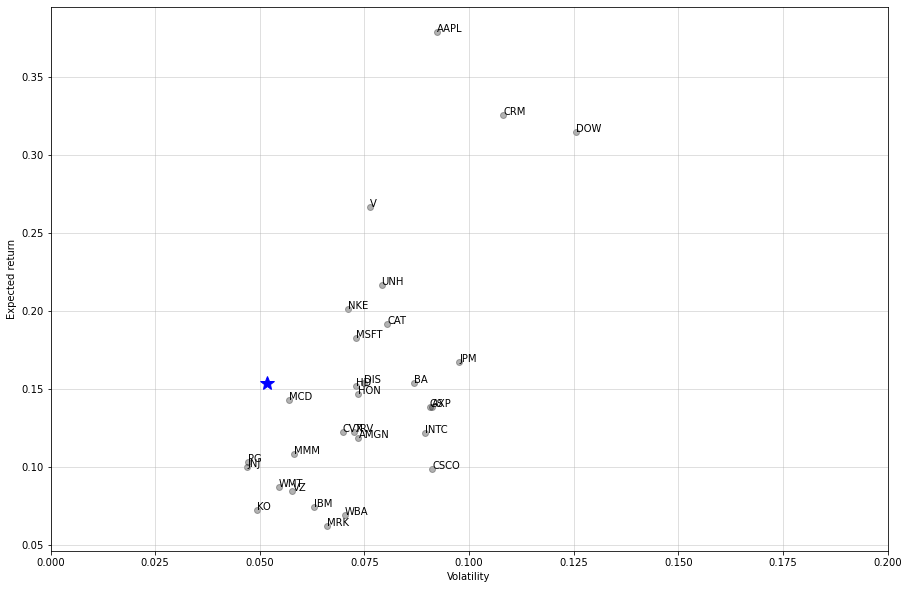

In [173]:
fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(ann_dow_vol, ann_dow_mean, c='k', alpha=0.3)
for i,lbl in enumerate(ann_dow_mean.index):
    ax.annotate(lbl, (ann_dow_vol[i], ann_dow_mean[i]))
    
plt.plot(eq_weight_port[1], eq_weight_port[0], 'b*', markersize=14)
    
ax.set_xlim(0,.2)
plt.xlabel('Volatility')
plt.ylabel('Expected return')
plt.grid(alpha=0.5)
plt.show()

Looking at the plot, are there any firms that “stick out” to you as possible outliers? That is, companies whose mean/volatility seem unlikely to continue in the future?

Apple, Salesforce, and Dow Inc all have mean/volatility data that appear as outliers in the Dow Jones since 2001. Apple in particular has the highest return over the life of the dataset, yet the volatility is only the 4th largest in the dataset, and isn't very far away from the 5th-9th highest volatilities. This trend of very high expected return with a volatility that is high, but not extreme, seems unlikely to continue for another 20 years.

What is the Sharpe ratio of the EW portfolio during this period?

In [174]:
sharpe_ew = eq_weight_port[2]
sharpe_ew

2.983626747728372

Using the analytical solution (*not* `scipy.optimize`), calculate the mean, volatility, and Sharpe ratios of the GMV and the Tangency portfolios.

In [175]:
## GMV ##
ann_dow_covinv = np.linalg.inv(ann_dow_cov)
ones = np.ones(len(ann_dow_mean))

A = ann_dow_mean.T @ ann_dow_covinv @ ann_dow_mean
B = ann_dow_mean.T @ ann_dow_covinv @ ones
C = ones @ ann_dow_covinv @ ones

In [176]:
#Mean GMV
gmv_mean = B/C
gmv_mean

0.1466656668711405

In [177]:
#Volatility GMV
gmv_vol = np.sqrt(1/C)
gmv_vol

0.04094218795544596

In [178]:
#Sharpe GMV
gmv_sharpe = gmv_mean/gmv_vol
gmv_sharpe

3.582262555942168

In [179]:
## Tangency ##
#Mean
tan_mean = A/B
tan_mean

0.3858536684541921

In [180]:
#Volatility Tangency
tan_vol = np.sqrt(A)/B
tan_vol

0.06640765335593485

In [181]:
#Sharpe Tangency
tan_sharpe = tan_mean/tan_vol
tan_sharpe

5.810379511320413

Use bar charts to plot the weights of the Tangency and GMV portfolios.

In [182]:
def eff_wgts(mu_p):
    '''Calculate weights of efficient portfolio given target return'''
    wgts = ann_dow_covinv @ ((C*mu_p-B)*ann_dow_mean + (A-B*mu_p)) / (A*C - B**2)
    return pd.Series(wgts, index=ann_dow_mean.index)

<AxesSubplot:>

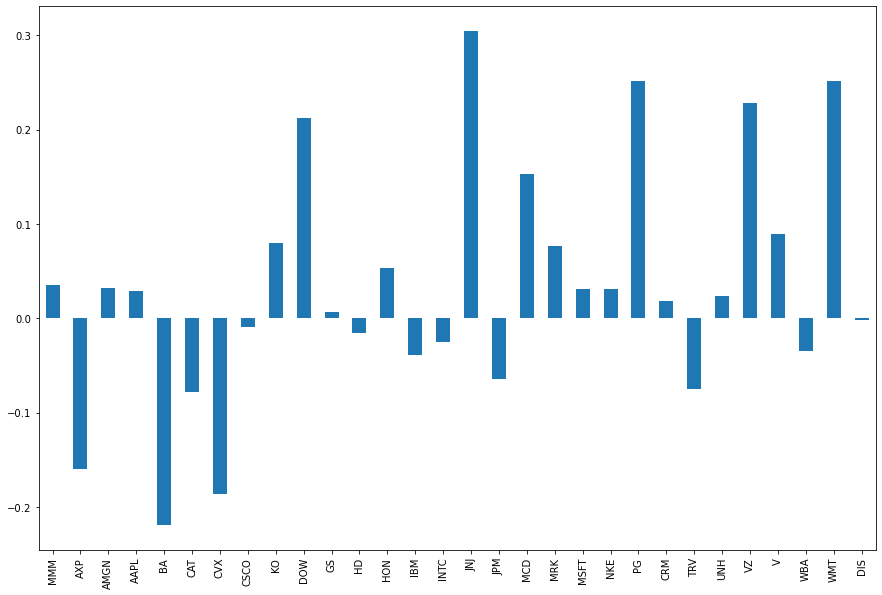

In [183]:
gmv_weights = eff_wgts(0.14610791990821442)
gmv_weights.plot(kind='bar', figsize=(15,10))

<AxesSubplot:>

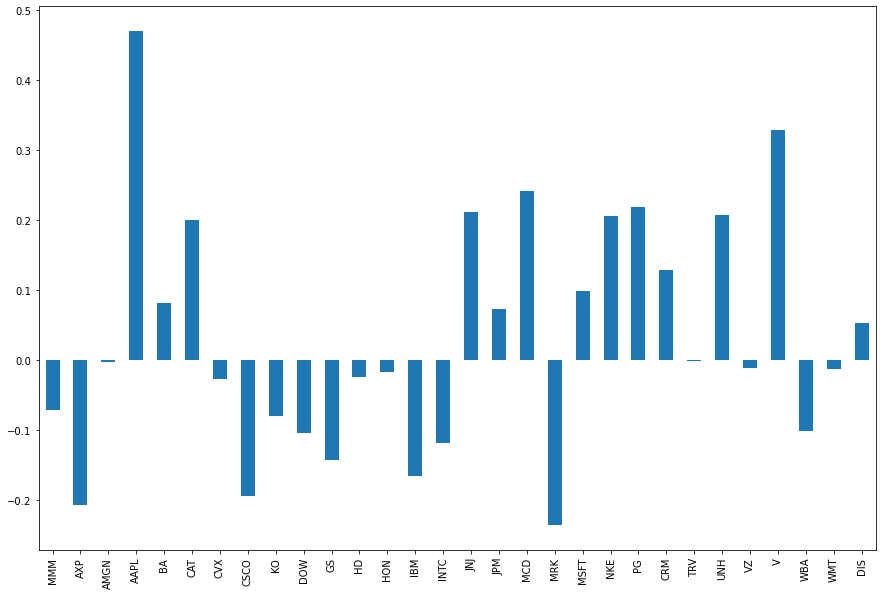

In [184]:
tan_weights = eff_wgts(0.3871278456384313)
tan_weights.plot(kind='bar',figsize=(15,10))

**Discuss** the Sharpe ratios for the EW, GMV, and Tangency portfolios. Do they *make sense*? Which of these portfolios would you recommend to an investor who is saving for retirement?

The order of Sharpe ratios between the EW, GMV and Tangency portfolios make sense as calculated above. Since the equal weighted portfolio is not constructed with expected returns nor variance in mind, it makes sense that it would have the lowest Sharpe ratio. Likewise, since the Tangency portfolio is constructed solely to maximize the Sharpe ratio, it makes sense that it would have the largest between the three portfolios.

## Shrinkage

One way to improve the estimation of the covariance matrix is to use [shrinkage](https://en.wikipedia.org/wiki/Estimation_of_covariance_matrices#Shrinkage_estimation). The idea of shrinkage is to combine together the usual sample estimate of covariance with another estimate — one that we know isn't very good, but is more “stable” and less sensitive to error.

That is, suppose that $S$ is the sample estimate of the covariance. We'll combine another estimate, $T$ (the “target”) using a weight $0\leq\delta\leq 1$ to get a new “shrunk” covariance estimate,

$$\hat{\Sigma} = \delta T + (1-\delta) S.$$

The target can be specified in different ways. For this exercise, I want you to use a matrix where the true sample variances are on the diagonal, and the off-diagonal terms equal the actual volatilities of each pair of stocks multiplied by the overall average correlation.

To do this, proceed in steps:
1. Calculate the overall *average correlation* across all assets. (Don't include all the ones from the diagonal of the correlation matrix!) This will give you just one number, call it $\rho$.
2. Now, create a 30$\times$30 matrix where the diagonal terms are $\sigma_i^2$. (That is, in row $i$ you have the variance of asset $i$.)
3. Finally, each off-diagonal value should be $\rho \times \sigma_i \times \sigma_j$ in position ($i$, $j$) of the matrix. This is easiest to do using a nested loop: loop over the columns and within each loop, do a loop over the rows.

This gives you the target, $T$. Finally, we choose a value of $\delta$ to get a new estimate of the covariance, $\hat{\Sigma}$.

Using $\delta = 0.3$, repeat the analysis above to determine the Sharpe ratios of the GMV and Tangency portfolios? (Again, no need for `scipy.optimize` here.) Is there a way in which this tangency portfolio makes more sense?

Pro-tip: the `np.triu` function can be helpful to calculate the average correlation. Pay close attention not to include the diagonal terms of the correlation matrix, which are all ones. The documentation for this function gives a way to control whether those are included.

In [185]:
#PART 1
corr_matrix = daily_returns_dow.corr()

In [186]:
corr_list = []
counter = -1
for index, row in corr_matrix.iterrows():
    counter += 1
    for i in range(0,30):
        if int(i) == counter:
            pass
        else:
            corr_list.append(row[i])

In [187]:
corr_array = np.array(corr_list)
rho = corr_array.mean()
rho

0.4299208135182045

In [188]:
#PART 2
shrink_matrix = ann_dow_cov.copy()
shrink_matrix

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DOW,...,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT,DIS
MMM,0.003382,0.002958,0.001702,0.002083,0.002462,0.002862,0.002149,0.002462,0.001345,0.006107,...,0.001914,0.001286,0.002313,0.002129,0.001838,0.001416,0.002301,0.001753,0.001290,0.002299
AXP,0.002958,0.008322,0.002457,0.003402,0.004232,0.004203,0.003429,0.003960,0.001924,0.009857,...,0.003155,0.001705,0.003867,0.003795,0.002957,0.002308,0.004599,0.002523,0.001833,0.004112
AMGN,0.001702,0.002457,0.005411,0.002196,0.002020,0.002047,0.001840,0.002459,0.001191,0.003998,...,0.001583,0.001296,0.002229,0.001893,0.002074,0.001449,0.002070,0.001732,0.001382,0.002108
AAPL,0.002083,0.003402,0.002196,0.008514,0.002652,0.002990,0.002156,0.004051,0.001315,0.005362,...,0.002406,0.001214,0.003685,0.002235,0.002087,0.001640,0.003013,0.001723,0.001545,0.002726
BA,0.002462,0.004232,0.002020,0.002652,0.007528,0.003538,0.003117,0.002939,0.001744,0.011636,...,0.002608,0.001432,0.003166,0.002780,0.002496,0.001636,0.003322,0.002271,0.001468,0.003265
CAT,0.002862,0.004203,0.002047,0.002990,0.003538,0.006463,0.003150,0.003303,0.001549,0.008842,...,0.002542,0.001352,0.003535,0.002681,0.002269,0.001802,0.003252,0.002187,0.001531,0.003192
CVX,0.002149,0.003429,0.001840,0.002156,0.003117,0.003150,0.004873,0.002372,0.001527,0.008884,...,0.002002,0.001366,0.002793,0.002568,0.002387,0.001644,0.003014,0.001824,0.001144,0.002597
CSCO,0.002462,0.003960,0.002459,0.004051,0.002939,0.003303,0.002372,0.008327,0.001463,0.005876,...,0.002614,0.001397,0.003632,0.002577,0.001902,0.002095,0.002952,0.001973,0.001833,0.003307
KO,0.001345,0.001924,0.001191,0.001315,0.001744,0.001549,0.001527,0.001463,0.002433,0.004809,...,0.001332,0.001260,0.001541,0.001531,0.001480,0.001221,0.001539,0.001266,0.000988,0.001605
DOW,0.006107,0.009857,0.003998,0.005362,0.011636,0.008842,0.008884,0.005876,0.004809,0.015745,...,0.005673,0.003337,0.005289,0.007247,0.005247,0.003111,0.006347,0.005949,0.002817,0.006600


In [189]:
#PART 3
column_list = shrink_matrix.columns.tolist()

In [190]:
for index, row in shrink_matrix.iterrows():
    for column in column_list:
        if column == index:
            pass
        else:
            row[column] = rho * ann_dow_vol[index] * ann_dow_vol[column]

In [191]:
shrink_matrix

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DOW,...,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT,DIS
MMM,0.003382,0.002281,0.001839,0.002307,0.002169,0.002010,0.001745,0.002281,0.001233,0.003137,...,0.001778,0.001181,0.002705,0.001810,0.001977,0.001445,0.001910,0.001759,0.001362,0.001873
AXP,0.002281,0.008322,0.002885,0.003619,0.003403,0.003153,0.002738,0.003579,0.001934,0.004921,...,0.002789,0.001852,0.004243,0.002840,0.003102,0.002267,0.002996,0.002759,0.002137,0.002938
AMGN,0.001839,0.002885,0.005411,0.002918,0.002744,0.002543,0.002208,0.002886,0.001560,0.003968,...,0.002249,0.001493,0.003422,0.002290,0.002501,0.001828,0.002416,0.002225,0.001723,0.002369
AAPL,0.002307,0.003619,0.002918,0.008514,0.003442,0.003189,0.002769,0.003620,0.001957,0.004978,...,0.002821,0.001873,0.004292,0.002872,0.003137,0.002293,0.003031,0.002790,0.002161,0.002972
BA,0.002169,0.003403,0.002744,0.003442,0.007528,0.002999,0.002604,0.003404,0.001840,0.004681,...,0.002653,0.001762,0.004036,0.002701,0.002950,0.002156,0.002850,0.002624,0.002032,0.002794
CAT,0.002010,0.003153,0.002543,0.003189,0.002999,0.006463,0.002413,0.003154,0.001705,0.004337,...,0.002458,0.001632,0.003739,0.002503,0.002734,0.001998,0.002641,0.002431,0.001883,0.002589
CVX,0.001745,0.002738,0.002208,0.002769,0.002604,0.002413,0.004873,0.002739,0.001480,0.003766,...,0.002134,0.001417,0.003247,0.002173,0.002374,0.001735,0.002293,0.002111,0.001635,0.002248
CSCO,0.002281,0.003579,0.002886,0.003620,0.003404,0.003154,0.002739,0.008327,0.001935,0.004923,...,0.002790,0.001853,0.004244,0.002841,0.003103,0.002268,0.002997,0.002760,0.002137,0.002939
KO,0.001233,0.001934,0.001560,0.001957,0.001840,0.001705,0.001480,0.001935,0.002433,0.002661,...,0.001508,0.001001,0.002294,0.001535,0.001677,0.001226,0.001620,0.001492,0.001155,0.001589
DOW,0.003137,0.004921,0.003968,0.004978,0.004681,0.004337,0.003766,0.004923,0.002661,0.015745,...,0.003836,0.002548,0.005836,0.003906,0.004267,0.003118,0.004122,0.003795,0.002939,0.004041


In [192]:
delta = .3

In [194]:
new_cov = ((1-delta)*ann_dow_cov)
new_cov

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DOW,...,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT,DIS
MMM,0.002367,0.002071,0.001192,0.001458,0.001723,0.002004,0.001504,0.001723,0.000941,0.004275,...,0.001340,0.000900,0.001619,0.001490,0.001287,0.000992,0.001610,0.001227,0.000903,0.001609
AXP,0.002071,0.005825,0.001720,0.002382,0.002963,0.002942,0.002400,0.002772,0.001347,0.006900,...,0.002208,0.001194,0.002707,0.002657,0.002070,0.001616,0.003220,0.001766,0.001283,0.002878
AMGN,0.001192,0.001720,0.003788,0.001537,0.001414,0.001433,0.001288,0.001721,0.000834,0.002799,...,0.001108,0.000907,0.001560,0.001325,0.001451,0.001014,0.001449,0.001213,0.000968,0.001476
AAPL,0.001458,0.002382,0.001537,0.005960,0.001857,0.002093,0.001509,0.002836,0.000921,0.003753,...,0.001684,0.000850,0.002580,0.001565,0.001461,0.001148,0.002109,0.001206,0.001081,0.001908
BA,0.001723,0.002963,0.001414,0.001857,0.005270,0.002476,0.002182,0.002057,0.001221,0.008145,...,0.001826,0.001002,0.002216,0.001946,0.001747,0.001145,0.002325,0.001590,0.001027,0.002285
CAT,0.002004,0.002942,0.001433,0.002093,0.002476,0.004524,0.002205,0.002312,0.001084,0.006190,...,0.001779,0.000947,0.002475,0.001877,0.001588,0.001261,0.002277,0.001531,0.001072,0.002234
CVX,0.001504,0.002400,0.001288,0.001509,0.002182,0.002205,0.003411,0.001661,0.001069,0.006219,...,0.001402,0.000956,0.001955,0.001798,0.001671,0.001151,0.002110,0.001277,0.000801,0.001818
CSCO,0.001723,0.002772,0.001721,0.002836,0.002057,0.002312,0.001661,0.005829,0.001024,0.004113,...,0.001830,0.000978,0.002542,0.001804,0.001331,0.001467,0.002066,0.001381,0.001283,0.002315
KO,0.000941,0.001347,0.000834,0.000921,0.001221,0.001084,0.001069,0.001024,0.001703,0.003366,...,0.000932,0.000882,0.001079,0.001071,0.001036,0.000855,0.001078,0.000886,0.000692,0.001124
DOW,0.004275,0.006900,0.002799,0.003753,0.008145,0.006190,0.006219,0.004113,0.003366,0.011022,...,0.003971,0.002336,0.003702,0.005073,0.003673,0.002178,0.004443,0.004165,0.001972,0.004620
